In [5]:
#Import modules 
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datsets
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [6]:
#Import dataset 
dataset = datsets.FashionMNIST(root='data/', download=True, transform=ToTensor())

image.shape: torch.Size([1, 28, 28])
Label: 9


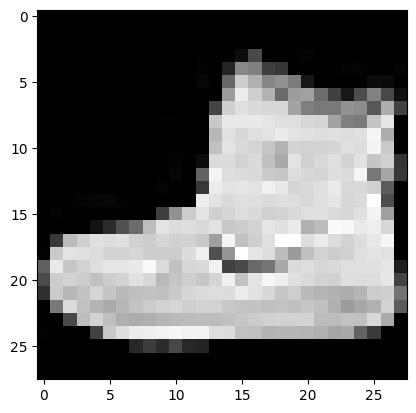

In [8]:
#Show image of one example 
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

In [9]:
#Split the train and test indicies 
def split_indices(n,val_pct):
    #determine size of validation set
    n_val = int(n*val_pct)
    #create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    #Pick first n_val random indices as validation set
    return idxs[n_val:], idxs[:n_val]

In [10]:
#Make 40% of the data testing data 
train_indices, val_indices = split_indices(len(dataset), 0.4)

print(len(train_indices))
print(len(val_indices))
print("Random Validation Samples:", val_indices[:5])

36000
24000
Random Validation Samples: [38942 40167 59878 41775 47381]


In [11]:
#Create the training and testing batches 
batch_size=512

#Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, 
                          batch_size, sampler = train_sampler)

#Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, 
                        batch_size, sampler = val_sampler)

images.shape: torch.Size([512, 1, 28, 28])


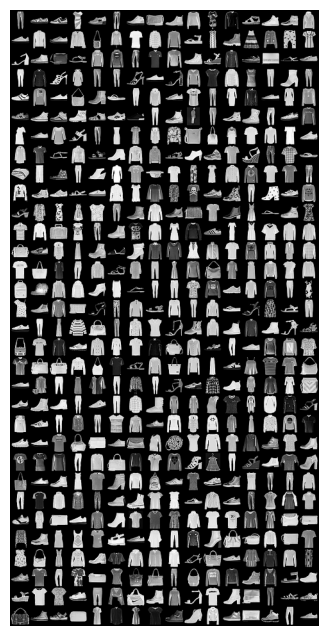

In [12]:
#Show the images of each batch 
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [13]:
#USe cuda when avilable 
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cpu')

In [15]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([512, 1, 28, 28])


NameError: name 'to_device' is not defined

In [ ]:
#Load the training and testing data 
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [ ]:
#load the ipynb files 
%run Model.ipynb
%run DeviceDataLoader.ipynb

In [ ]:
#Make the model with the respective params and put it into your GPU/CPU device 
model = actModel(in_dim=784, hid_dim=32, out_dim=10, n_layer=5)
to_device(model, device)

In [ ]:
history = []
LR = [0.5, 0.25, 0.125]

In [ ]:
#Fit the model 
fit(epochs=1, lr=0.001, mo=0, model=model, train_loader=train_loader, val_loader=val_loader)

In [ ]:
#Fit the model 
for i in range(len(LR)):
    history += fit(epochs=10, lr=LR[i], mo=0.1, model=model, train_loader=train_loader, val_loader=val_loader)

In [ ]:
#Plot the losses 
if 1==0: 
    losses = [x['val_loss'] for x in history]
    plt.plot(np.array(losses), '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [ ]:
accuracies = [x['val_acc'] for x in history]
plt.plot(-np.log(1-np.array(accuracies)), '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');
print(max(-np.log(1-np.array(accuracies))))

In [5]:
time = [x['epoch_time'] for x in history]
plt.plot(time, '-x')
plt.xlabel('epoch')
plt.ylabel('time (s)')
plt.title('Time per epoch');

NameError: name 'history' is not defined

In [ ]:
np.mean(time), np.std(time)

In [ ]:
#Find statistics about the parameter weighst 
a_params = []
b_params = []
c_params = []

for i in range(50):
    a_params += [float(model.layers[i].activation.a)]
    b_params += [float(model.layers[i].activation.b)]
    c_params += [float(model.layers[i].activation.c)]

In [ ]:
np.mean(a_params), np.std(a_params)

In [ ]:
np.mean(b_params), np.std(b_params)

In [ ]:
np.mean(c_params), np.std(c_params)

In [ ]:
import numpy as np 
import plotly.express as px

In [ ]:
plt.boxplot(a_params)
plt.show()

In [13]:
plt.boxplot(b_params)
plt.show()

NameError: name 'plt' is not defined

In [15]:
plt.boxplot(c_params)
plt.show()

NameError: name 'plt' is not defined